In [2]:
library(ggplot2)
library(tidyverse)

Q.1
* We have use the following dataset in the course material to generate two datasets form the same distribution but which have different sample means
  * here I am generating only 5 samples, insteaf of the 40 generated in the course material

In [9]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2
10.225640,Site 2


In [10]:
* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '*'
1: *
    ^


In [11]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 10.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed

In [12]:
# Write your code here

tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 10.11935

Q.2 
Recall that the test conducted on full version of data_1 and data_2 led us to conlclude that the difference between the two datasets is statistically significant, when both samples were in fact from the same distirbution  $\mathcal{N}(\mu=10, \sigma=1)$

* Use the boostrapping-based test covered in class to assess whether you arrive at the same conclusion

* You can generate the data using the code snippet below



In [13]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


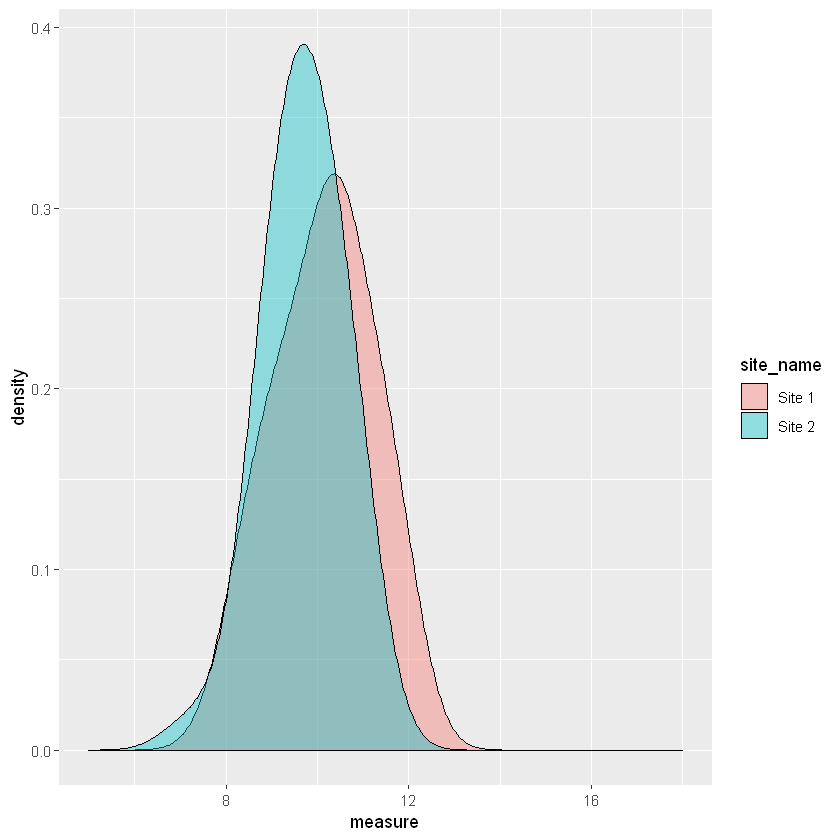

In [14]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)


In [31]:
t.test(data_1$measure, data_2$measure, )


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = 2.1064, df = 74.217, p-value = 0.03855
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02414693 0.86823685
sample estimates:
mean of x mean of y 
 10.14979   9.70360 


In [21]:
processOneIter = function(data_1, data_2){
    
    concat_data = c(data_1$measure, data_2$measure)
    len_concat_data = length(concat_data)
    
    len_data_1 = length(data_1)    
    shuffled_data = sample(concat_data)
    new_data_1 = shuffled_data[1:len_data_1]
    new_data_2 = shuffled_data[(len_data_1 + 1):len_concat_data]
    mean(new_data_1) - mean(new_data_2)
    
}
processOneIter(data_1, data_2)

[1] -0.6137749

In [22]:
replicate(5, processOneIter(data_1, data_2))

[1]  0.7700008 -0.1149717 -0.6250067 -0.7530993  1.4738278

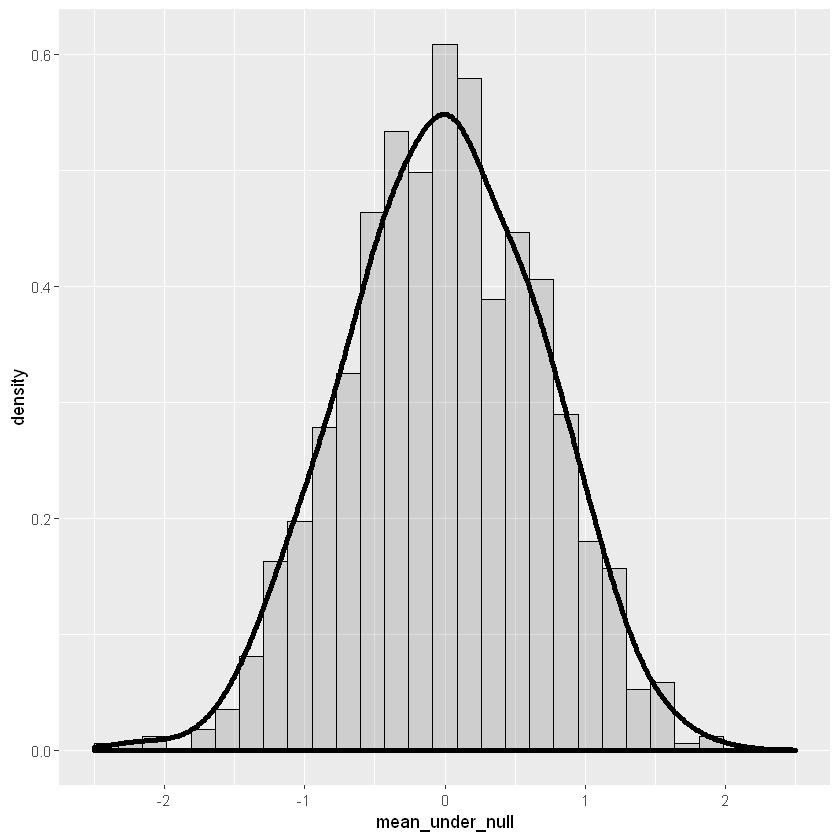

In [24]:
mean_under_null = replicate(1000, processOneIter(data_1, data_2))

ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-2.5, 2.5)

In [26]:
observed_value = mean(data_1$measure) - mean(data_2$measure)
observed_value

[1] 0.4461919

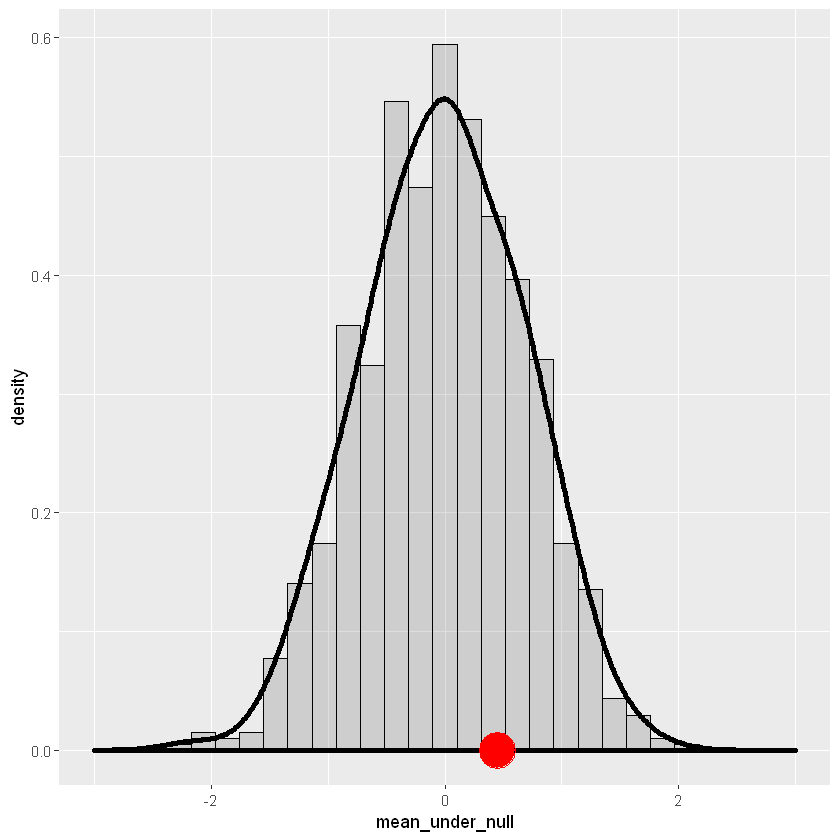

In [30]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.2, size=1.5) + 
  xlim(-3, 3)+
  geom_point(aes(observed_value, 0), color="red", size=10)

Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed a site Y with somewhat differentenvironmental conditions and obtains the following proportions for the same coral (0.61, 0.19, 0.20). Use the multinomial non-parameteric hypotheses test to assess the proportions obtained at sites X and Y are statistically differnet



In [37]:
kind = c('P.lobata', 'P.lobata', 'M.capitata', 'M.capitata', 'P.mendrina', 'P.mendrina')
ratios = c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
method = rep(c("site_x", "site_y"), 3)


coral_proportions = tibble(kind, ratios, method)
coral_proportions

kind,ratios,method
P.lobata,0.60,site_x
P.lobata,0.61,site_y
M.capitata,0.19,site_x
M.capitata,0.19,site_y
P.mendrina,0.21,site_x
P.mendrina,0.20,site_y


In [33]:
rmultinom(1, 200, prob=c(0.60, 0.19, 0.21))/200

0.670
0.165
0.165


In [34]:
sampleOneIteration = function(){
    true_proportions = c(0.60, 0.19, 0.21)
    sample_proportions = rmultinom(1, 200, prob=c(0.61, 0.19, 0.20))/200
    sample_tvd = sum(abs(true_proportions- sample_proportions))/2
    sample_tvd
        
}
sampleOneIteration()

[1] 0.03

In [35]:
tvds = replicate(1000, sampleOneIteration())

In [39]:
subtract_abs = function(x){
    abs(x[1] - x[2])
}


sum(tapply(coral_proportions$ratios, coral_proportions$kind, subtract_abs))/2

[1] 0.01

In [40]:
observed_stat = sum(tapply(coral_proportions$ratios, coral_proportions$kind, subtract_abs))/2

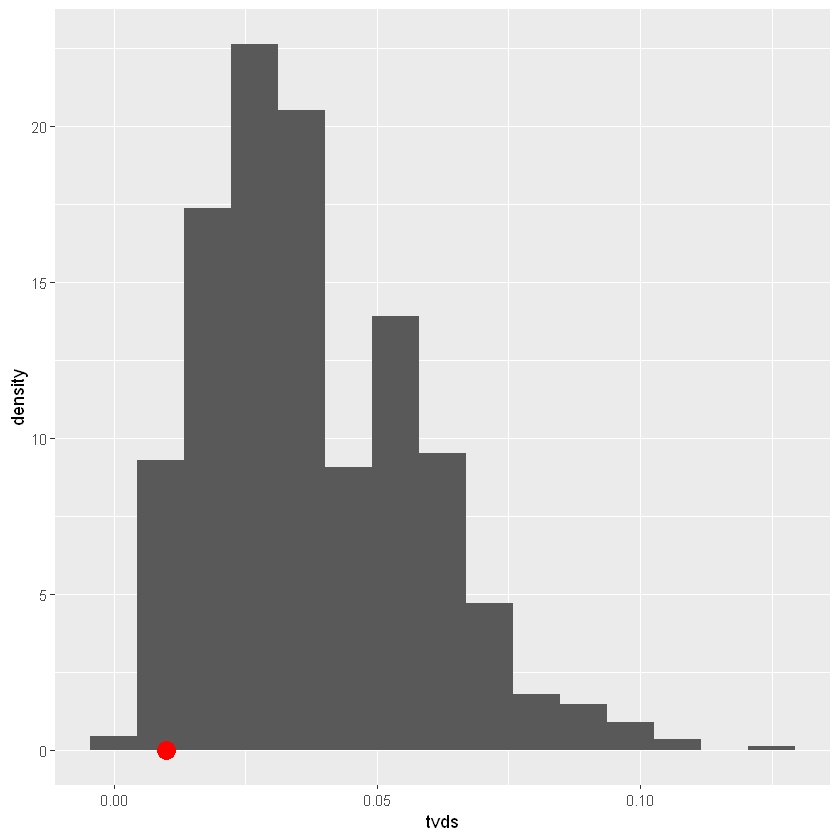

In [41]:
ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")

In [42]:
p_value = sum(tvds > observed_stat)  / length(tvds)
p_value

[1] 0.952